In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import fsolve
import dill  #pip install dill --user  OR pip3 install dill --user 
# from gwi_sub_ph import * 
from numpy.random import default_rng
import sys
import time
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
import netCDF4 as nc
from netCDF4 import Dataset
from numpy import *
from scipy.stats import variation
from scipy import stats
from numpy.random import default_rng
fs = 16

In [2]:
#add new data to the set and refit 
#tries to refit the data with new F(t0) output for Sq evolution
# stack available data sets 
Mreal_joined = []
Ninit_joined =[]
Qinit_joined = []
Ft0_joined = []
Npost_joined = []
mstar_joined =[]
t0_joined = []
Qi0_fs = []
mom_flux_joined = []

# add the 1 GW cases with w00 and without w00

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_1GW_Nfull.dat",unpack = True)
ngw =1
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Npost_onlyw00 = d[3+3*ngw+2,:]
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_1gw = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_valid_setup1GWw00_Ft0formS.dat",unpack = True)
ngw =1
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Npost_onlyw00 = d[3+3*ngw+2,:]
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_1gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))


# all other cases 2, 5, 10 Gw and w00 only 


d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_w00.dat",unpack = True)
ngw =1
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Npost_onlyw00 = d[3+3*ngw+2,:]
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
print(len(d[3+3*ngw+4,:]))

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_2GWw00.dat",unpack = True)
ngw =2
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_2gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))
d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_2GW.dat",unpack = True)
ngw =2
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_2gw = d[3+3*ngw+2,:]
# Npost_2gw = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))
d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_5GWw00.dat",unpack = True)
ngw =5
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_5gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_5GW.dat",unpack = True)
ngw =5
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_5gw = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_10GW.dat",unpack = True)
ngw =10
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_10gw = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))
d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_10GWw00.dat",unpack = True)
ngw =10
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_10gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))

d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_lowerNpost5gww00.dat",unpack = True)
ngw =5

d_select =np.where(d[3+3*ngw,:]<2000)
t0_joined= np.append(t0_joined, d[3+3*ngw,d_select])
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,d_select])
Ninit_joined = np.append(Ninit_joined, d[0,d_select])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,d_select])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,d_select])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,d_select])


Qinit_joined = np.append(Qinit_joined,d[2,d_select])
mom_flux_joined = np.append(mom_flux_joined,d[-1,d_select])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,d_select])



print(len(d[3+3*ngw+4,:]))
print(len(d_select[0][:]))

d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_verification_6GWw00_fs.dat",unpack = True)
ngw =6

d_select =np.where(d[3+3*ngw,:]<2000)
t0_joined= np.append(t0_joined, d[3+3*ngw,d_select])
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,d_select])
Ninit_joined = np.append(Ninit_joined, d[0,d_select])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,d_select])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,d_select])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,d_select])


Qinit_joined = np.append(Qinit_joined,d[2,d_select])
mom_flux_joined = np.append(mom_flux_joined,d[-1,d_select])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,d_select])

646
15498
826
331
138
662
19
20
1148
108642
73142


In [3]:
646 +15498+826+331+138+662+19+ 20+1148+108642+73142

201072

In [4]:
Mreal_joined = []
Ninit_joined =[]
Qinit_joined = []
Ft0_joined = []
Npost_joined = []
mstar_joined =[]
t0_joined = []
Qi0_fs = []
mom_flux_joined = []


d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_lowerNpost5gww00.dat",unpack = True)
ngw =5

d_select =np.where(d[3+3*ngw,:]<2000)
t0_joined= np.append(t0_joined, d[3+3*ngw,d_select])
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,d_select])
Ninit_joined = np.append(Ninit_joined, d[0,d_select])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,d_select])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,d_select])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,d_select])


Qinit_joined = np.append(Qinit_joined,d[2,d_select])
mom_flux_joined = np.append(mom_flux_joined,d[-1,d_select])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,d_select])



In [4]:
print(len(Ft0_joined))

73142


In [83]:
def func_test(x, a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15):
    x1, x2 = x

#     return a1 +a2*x1**5 + a3*x1 + a4*x2**(1/3) + a5*x1**6*x2**(-1/3) #+ a6*x1**(2)*x2**(-1/3)


    #return (a1  + a2* x2**(1/3)   + a3 *x1**(1/3) + a4*x1*x2**2)
    return (a1  + a2* x2**(1/3)   + a3 *x1**(1/3) + a4*x1*x2**(1/3))
   # return (a1  + a2* x2**(1/3)   + a3 *x1**(1/3)/x2**(1/3) + a4*(x1)*x2**2) + a5*x1**2

popt, pcov = curve_fit(func_test, [(Ninit_joined),Ft0_joined],np.log(Mreal_joined))
#popt, pcov = curve_fit(non_lin, [np.log(n_filtered),F_filtered,m0_filtered],np.log(mm_filtered))
print(*popt)
print('max error:',max(abs(Mreal_joined-np.exp(func_test([(Ninit_joined),Ft0_joined], *popt)))/Mreal_joined*100),
      'mean error',np.mean(abs(Mreal_joined-np.exp(func_test([(Ninit_joined),Ft0_joined], *popt)))/Mreal_joined*100))
# m0_nfm

-25.52154151511182 -68.85899770525059 0.0937374497040543 -3.337487358220786e-05 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
max error: 27573.885146590834 mean error 31.122191051799057


/home/administrator/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [89]:
deln = 3e1
delF = 0.000005
n_filter = np.where((Ninit_joined>1e3-deln) & (Ninit_joined <1e3+deln) )
F_filter = np.where((Ft0_joined>(0.0003-delF))&(Ft0_joined<(0.0003+delF)))
print(len(F_filter[0][:]))

216


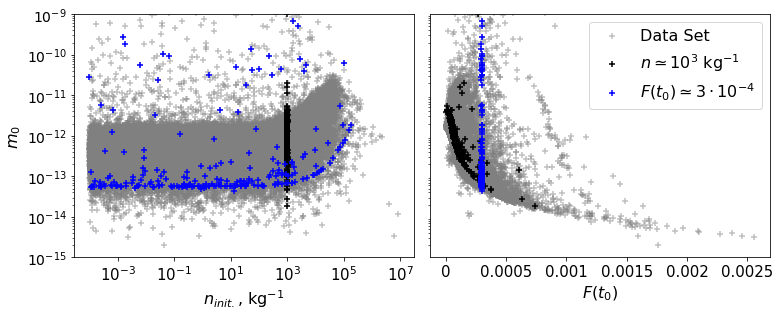

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4.5), tight_layout=True)
ax[0].scatter(Ninit_joined[np.where((t0_joined<1500))],Mreal_joined[np.where((t0_joined<1500))],marker = '+',color = 'gray',label = 'data', alpha = 0.5)
ax[0].scatter(Ninit_joined[n_filter],Mreal_joined[n_filter],marker = '+',color = 'black',label = 'data')
ax[0].scatter(Ninit_joined[F_filter],Mreal_joined[F_filter],marker = '+',color = 'blue',label = 'data')
ax[0].set(ylim = (1e-15,1e-9))
# ax[0,0].scatter(n_old,yy_nfm[1][:],marker = '+',color = 'gray',label = 'old data')
# ax[0,0].scatter(n_nfm,m0_apr_nfm,marker = '+',color = 'red',label = 'data')

ax[0].set(yscale = 'log',xscale = 'log')
ax[0].set_ylabel(r'$m_0$',fontsize=fs)
ax[0].set_xlabel(r'$n_{init.}$, kg$^{-1}$',fontsize=fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize=fs)
# plt.show()
# fig, ax = plt.subplots(figsize=(7,5))
ax[1].scatter(Ft0_joined[np.where((t0_joined<1500))],Mreal_joined[np.where((t0_joined<1500))],marker = '+',color = 'gray',label = 'Data Set', alpha = 0.5)
ax[1].scatter(Ft0_joined[n_filter],Mreal_joined[n_filter],marker = '+',color = 'black',label = '$n \simeq 10^3$ kg$^{-1}$')
ax[1].scatter(Ft0_joined[F_filter],Mreal_joined[F_filter],marker = '+',color = 'blue',label = '$F(t_0) \simeq 3\cdot 10^{-4}$')
# ax[0,1].scatter(ft_old,yy_nfm[1][:],marker = '+',color = 'gray',label = 'data')
ax[1].set(ylim = (1e-15,1e-9))
# ax[0,1].set(xlim = (0,0.0025))
# plt.legend(loc = 'lower right')
# ax[1].set(yscale = 'log')


for axs in ax.flat:
#     axs.set_xticks([])
#     axs.set_xticklabels(labels=[])
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-2)
    axs.set(yscale = 'log')
ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025])
# ax[1].set_xscale("log")
ax[1].legend(loc = "upper right",fontsize = fs)

#plt.savefig('output_draft_plots/new_ensembl10e_full_draft.png',bbox_inches='tight',dpi=300)
plt.show()

In [91]:
# functionf for test of the parameterisation

def new_simple_fit_13(Nin, Ft0):
    a1, a2, a3, a4 = -25.325647262283194, -74.5502113819399, 0.08935198805596141, -2.9198249274795298e-05
    return  np.exp(a1  + a2* Ft0**(1/3)   + a3 *Nin**(1/3) + a4*Nin*Ft0**(1/3))

def N_post_check(n_ic,Ft0,m0_aprox):
    Sc = 1.5
    CMC = 4.3*1e-8
    eps0 = 0.62
    D = CMC/eps0*210
    
    #NN_apr = 2*Ft0 *Sc/D/(m0_apr_dat)**(1/3)/(Sc-1)-npost
    NN_apr =2*Ft0 *Sc/D/(m0_aprox)**(1/3)/(Sc-1)-n_ic  
    return (NN_apr)
def difference_in_2(dat1,dat_main,Ncase1, Ncase_main):
    delt = []

    for j in range(0,len(Ncase1)):
        for i in range(0,len(Ncase_main)):
            if ((Ncase1[j] == Ncase_main[i]) & (dat_main[i]>0)):
                delt.append(abs(dat1[j]-dat_main[i])/dat_main[i]*100)
#                 delt.append((dat1[j]-dat_main[i])/dat_main[i]*100)
    return delt

#check for individual cases 
#generalized version to read data 
def read_data_dat(file_name):
    yr = []
    tr = []
    vr = []
    qq = []

    with open(file_name) as f:
        for line in f:
            line = line.strip().split()
            tr.append(float(line[0]))
            yr.append(float(line[1]))
            vr.append(float(line[2]))
            qq.append(float(line[3]))
    return [tr, yr, vr, qq]

In [92]:
# test on independent data set. 
# 1st balanced test with "ideal dt"
#joined varification data set 
Mreal_joined = []
Ninit_joined =[]
Qinit_joined = []
Ft0_joined = []
Npost_joined = []
mstar_joined =[]
t0_joined = []
Qi0_fs = []
mom_flux_joined = []

# add the 1 GW cases with w00 and without w00

d = loadtxt('../partcel_mod_dat/VM_dataset_out_verification_6GWw00_fs.dat', unpack = True)
ngw =6

Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,0:3000])
Ninit_joined = np.append(Ninit_joined,  d[0,0:3000])
Npost_joined= np.append(Npost_joined,d[3+3*ngw+2,0:3000])
Ft0_joined= np.append(Ft0_joined,  d[3+3*ngw+1,0:3000])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+6,0:3000])
mstar_joined= np.append(mstar_joined,  d[3+3*ngw+3,0:3000])


d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_3GW_fs.dat",unpack = True)
ngw =3
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Npost_onlyw00 = d[3+3*ngw+2,:]
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_1gw = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_3GWw00_fs.dat",unpack = True)
ngw =3
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Npost_onlyw00 = d[3+3*ngw+2,:]
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_1gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))


# all other cases 2, 5, 10 Gw and w00 only 


d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_8GW_fs.dat",unpack = True)
ngw =8
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Npost_onlyw00 = d[3+3*ngw+2,:]
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
print(len(d[3+3*ngw+4,:]))

d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_8GWw00_fs.dat",unpack = True)
ngw =8
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_2gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))
d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_14GW_fs.dat",unpack = True)
ngw =14
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_2gw = d[3+3*ngw+2,:]
# Npost_2gw = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))
d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_14GWw00_fs.dat",unpack = True)
ngw =14
Mreal_joined = np.append(Mreal_joined,d[3+3*ngw+4,:])
Ninit_joined = np.append(Ninit_joined, d[0,:])
Npost_joined= np.append(Npost_joined, d[3+3*ngw+2,:])
Ft0_joined= np.append(Ft0_joined, d[3+3*ngw+1,:])
mstar_joined= np.append(mstar_joined, d[3+3*ngw+3,:])
t0_joined= np.append(t0_joined, d[3+3*ngw,:])
Qinit_joined = np.append(Qinit_joined,d[2,:])
mom_flux_joined = np.append(mom_flux_joined,d[-1,:])
Qi0_fs = np.append(Qi0_fs,d[3+3*ngw+5,:])
Npost_5gww00 = d[3+3*ngw+2,:]
print(len(d[3+3*ngw+4,:]))

Mreal_joined_test= Mreal_joined
Ninit_joined_test = Ninit_joined
Qinit_joined_test = Qinit_joined
Ft0_joined_test = Ft0_joined
Npost_joined_test = Npost_joined
mstar_joined_test =mstar_joined
t0_joined_test = t0_joined
Qi0_fs_test = Qi0_fs
mom_flux_joined_test = mom_flux_joined


79
76
74
95
76
90


In [93]:
79+76+74+95+76+90

490

In [93]:

simple_test = new_simple_fit_13(Ninit_joined_test, Ft0_joined_test)
n_post_test = N_post_check(Ninit_joined_test, Ft0_joined_test,simple_test)

deltaM = abs(simple_test-Mreal_joined_test)/Mreal_joined_test*100
deltaNpost = abs(n_post_test-Npost_joined_test)/Npost_joined_test*100

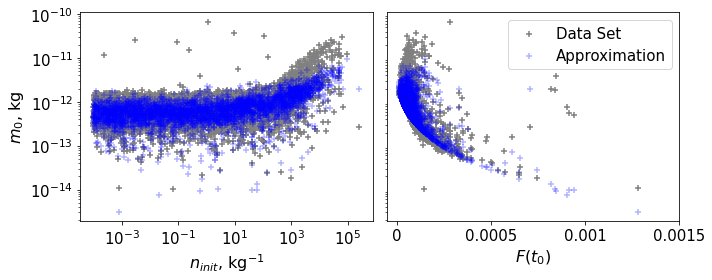

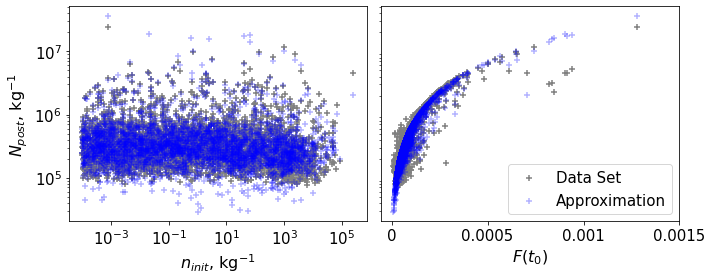

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),tight_layout=True)
ax[0].scatter(Ninit_joined_test,Mreal_joined_test,marker = '+',color = 'gray',label = 'Data Set')
ax[0].scatter(Ninit_joined_test,simple_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)
ax[0].set(yscale = 'log',xscale = 'log')
ax[1].scatter(Ft0_joined_test,Mreal_joined_test,marker = '+',color = 'gray',label = 'Data Set')
ax[1].scatter(Ft0_joined_test,simple_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)
ax[1].legend(loc = 'upper right',fontsize = 15)
ax[1].set(yscale = 'log')
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-1)
ax[0].set_xlabel(r'$n_{init}$, kg$^{-1}$',fontsize = fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize = fs)
ax[0].set_ylabel(r'$m_{0}$, kg',fontsize = fs)

ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015])
#plt.savefig('output_draft_plots/m0_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),tight_layout=True)
ax[0].scatter(Ninit_joined_test,Npost_joined_test,marker = '+',color = 'gray',label = 'Data Set')
ax[0].scatter(Ninit_joined_test,n_post_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)

ax[0].set(yscale = 'log',xscale = 'log')

# plt.show()
# fig, ax = plt.subplots(figsize=(7,5))
ax[1].scatter(Ft0_joined_test,Npost_joined_test,marker = '+',color = 'gray',label = 'Data Set')
# ax[1].scatter((Ft0_joined),(np.exp(non_lin_nfm([(Ninit_joined),Ft0_joined], *popt))),marker = '+',label = 'fit',color="red")

# ax[1].scatter(Ft0_joined[n_filter],Mreal_joined[n_filter],marker = '+',color = 'black',label = 'data')
# ax[1].scatter(Ft0_joined[F_filter],Mreal_joined[F_filter],marker = '+',color = 'blue',label = 'data')
# ax[0,1].scatter(ft_old,yy_nfm[1][:],marker = '+',color = 'gray',label = 'data')
# ax[1].set(ylim = (1e-15,1e-11))
ax[1].scatter(Ft0_joined_test,n_post_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-1)
ax[1].legend(loc = 'lower right',fontsize = 15)
ax[1].set(yscale = 'log')
ax[0].set_xlabel(r'$n_{init}$, kg$^{-1}$',fontsize = fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize = fs)
ax[0].set_ylabel(r'$N_{post}$, kg$^{-1}$',fontsize = fs)
ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015])
# plt.savefig('Npost_testDS.png',bbox_inches='tight',dpi=300)
#plt.savefig('output_draft_plots/Npost_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

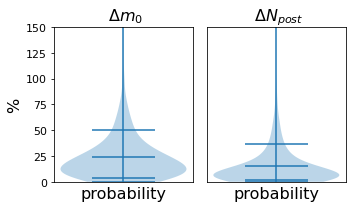

mean delta M and Npost: 23.68519905066142 15.673991645122054
90th percentile dM, dN 95th dN: 50.44890404316033 36.81079720776646 51.07591754885996


In [112]:
fig, axs = plt.subplots(ncols = 2, figsize=(5, 3),tight_layout=True)
fs = 16
axs[0].set_ylim(0,150)
axs[1].set_ylim(0,150)
axs[0].violinplot(deltaM, [1], points=len(deltaM), widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# axs[ 0].set_title('Produced $n$', fontsize=fs)
axs[1].violinplot(deltaNpost, [1], points=len(deltaM), widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# axs[1].set_ylim(0,40)
#axs[ 1].violinplot(s_diff, [1], points=9918, widths=0.9,
                     #showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    ax.set_xticks([])
    ax.set_xticklabels(labels=[])
    ax.set_xlabel('probability',fontsize=fs)
axs[0].set_ylabel('%',fontsize=fs)
axs[1].set_yticklabels(labels=[])
axs[1].set_yticks([])
# plt.savefig('m0_violine_Fn.png',dpi=300)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('output_draft_plots/mN_violines_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

print("mean delta M and Npost:", np.mean(deltaM), np.mean(deltaNpost))
print("90th percentile dM, dN 95th dN:", np.percentile(deltaM,90), np.percentile(deltaNpost,90),np.percentile(deltaNpost,95))

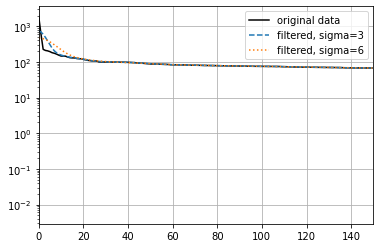

In [127]:
from scipy.ndimage import gaussian_filter1d

import numpy as np


import matplotlib.pyplot as plt

rng = np.random.default_rng()

x = deltaM

y3 = gaussian_filter1d(x, 3)

y6 = gaussian_filter1d(x, 6)

plt.plot(x, 'k', label='original data')

plt.plot(y3, '--', label='filtered, sigma=3')

plt.plot(y6, ':', label='filtered, sigma=6')
plt.xlim(0,150)
plt.yscale('log')
plt.legend()

plt.grid()

plt.show()

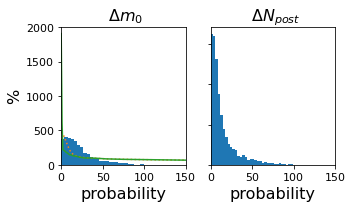

In [129]:
fig, axs = plt.subplots(ncols = 2, figsize=(5, 3),tight_layout=True)
fs = 16

xx = np.arange(0,len(deltaM),1)
axs[0].hist(deltaM,500)
axs[1].hist(deltaNpost,500)
# axs[1].set_ylim(0,40)
#axs[ 1].violinplot(s_diff, [1], points=9918, widths=0.9,
                     #showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    #ax.set_xticks([])
    #ax.set_xticklabels(labels=[])
    ax.set_xlim(0,150)
    ax.set_xlabel('probability',fontsize=fs)
axs[0].set_ylabel('%',fontsize=fs)
axs[1].set_yticklabels(labels=[])
axs[0].plot(y6, ':', label='filtered, sigma=6')
#axs[1].set_yticks([])
xx = np.arange(0,len(deltaM),1)
axs[0].plot(xx,deltaM)

# plt.savefig('m0_violine_Fn.png',dpi=300)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('output_draft_plots/mN_violines_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

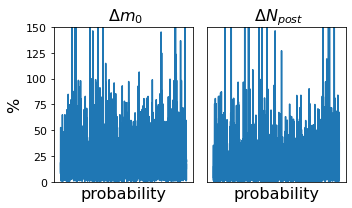

In [39]:
len(deltaM)
fig, axs = plt.subplots(ncols = 2, figsize=(5, 3),tight_layout=True)
fs = 16
axs[0].set_ylim(0,150)
axs[1].set_ylim(0,150)
xx = np.arange(0,len(deltaM),1)
axs[0].plot(xx,deltaM)
axs[1].plot(xx,deltaNpost)
# axs[1].set_ylim(0,40)
#axs[ 1].violinplot(s_diff, [1], points=9918, widths=0.9,
                     #showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    ax.set_xticks([])
    ax.set_xticklabels(labels=[])
    ax.set_xlabel('probability',fontsize=fs)
axs[0].set_ylabel('%',fontsize=fs)
axs[1].set_yticklabels(labels=[])
axs[1].set_yticks([])
# plt.savefig('m0_violine_Fn.png',dpi=300)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('output_draft_plots/mN_violines_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()


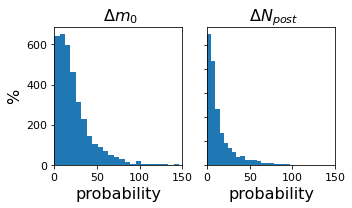

In [114]:
fig, axs = plt.subplots(ncols = 2, figsize=(5, 3),tight_layout=True)
fs = 16

xx = np.arange(0,len(deltaM),1)
axs[0].hist(deltaM,300)
axs[1].hist(deltaNpost,300)
# axs[1].set_ylim(0,40)
#axs[ 1].violinplot(s_diff, [1], points=9918, widths=0.9,
                     #showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    #ax.set_xticks([])
    #ax.set_xticklabels(labels=[])
    ax.set_xlim(0,150)
    ax.set_xlabel('probability',fontsize=fs)
axs[0].set_ylabel('%',fontsize=fs)
axs[1].set_yticklabels(labels=[])
#axs[1].set_yticks([])

# plt.savefig('m0_violine_Fn.png',dpi=300)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('output_draft_plots/mN_violines_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()


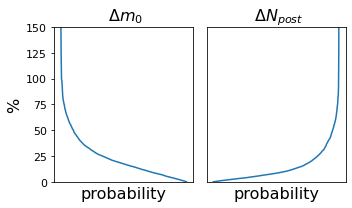

In [116]:

fig, axs = plt.subplots(ncols = 2, figsize=(5, 3),tight_layout=True)
fs = 16
axs[0].set_ylim(0,150)
axs[1].set_ylim(0,150)
xx = np.arange(0,len(deltaM),1)
axs[0].plot(xx,deltaM)
axs[1].plot(xx,deltaNpost)
# axs[1].set_ylim(0,40)
#axs[ 1].violinplot(s_diff, [1], points=9918, widths=0.9,
                     #showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    ax.set_xticks([])
    ax.set_xticklabels(labels=[])
    ax.set_xlabel('probability',fontsize=fs)
axs[0].set_ylabel('%',fontsize=fs)
axs[1].set_yticklabels(labels=[])
axs[1].set_yticks([])
# plt.savefig('m0_violine_Fn.png',dpi=300)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('output_draft_plots/mN_violines_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

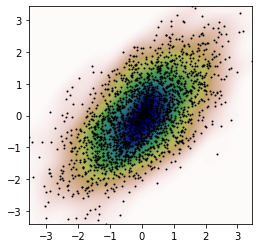

In [141]:
def measure(n):

    "Measurement model, return two coupled measurements."

    m1 = np.random.normal(size=n)

    m2 = np.random.normal(scale=0.5, size=n)

    return m1+m2, m1-m2
m1, m2 = measure(2000)

xmin = m1.min()

xmax = m1.max()

ymin = m2.min()

ymax = m2.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([m1, m2])

kernel = stats.gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,

          extent=[xmin, xmax, ymin, ymax])

ax.plot(m1, m2, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])

ax.set_ylim([ymin, ymax])

plt.show()

/tmp/ipykernel_3957/2427380057.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  density = sum(norm(xi).pdf(x_d) for xi in x)


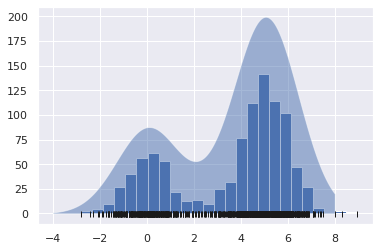

In [163]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x


x = make_data(1000)
hist = plt.hist(x, bins=25)


x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -1), '|k', markeredgewidth=1)





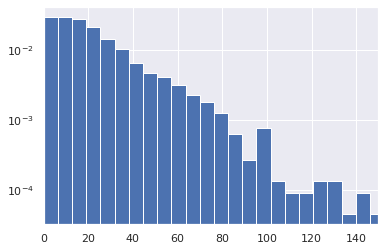

In [246]:
hist = plt.hist(deltaM, bins=300,density=True)
plt.xlim(0,150)
plt.yscale('log')

/tmp/ipykernel_3957/2322142143.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  density = sum(norm(xi).pdf(x_d) for xi in x)


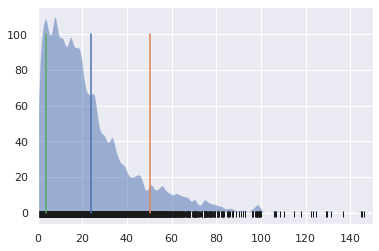

In [183]:

x = deltaM
#hist = plt.hist(x, bins=300)


x_d = np.linspace(min(deltaM),max(deltaM), len(deltaM))
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -1), '|k', markeredgewidth=1)
plt.xlim(0,150)
plt.plot([np.mean(x),np.mean(x)],[0,100])
plt.plot([np.percentile(x,90),np.percentile(x,90)],[0,100])
plt.plot([np.percentile(x,10),np.percentile(x,10)],[0,100])


/tmp/ipykernel_3957/4282116037.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  density = sum(norm(xi).pdf(x_d) for xi in x)


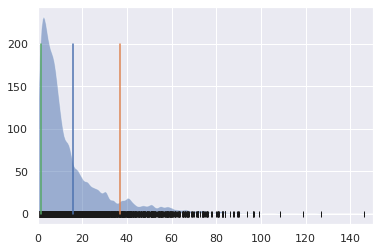

In [184]:
x = deltaNpost
#hist = plt.hist(x, bins=300)


x_d = np.linspace(min(deltaM),max(deltaM), len(deltaM))
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -1), '|k', markeredgewidth=1)
plt.xlim(0,150)
plt.plot([np.mean(x),np.mean(x)],[0,200])
plt.plot([np.percentile(x,90),np.percentile(x,90)],[0,200])
plt.plot([np.percentile(x,10),np.percentile(x,10)],[0,200])

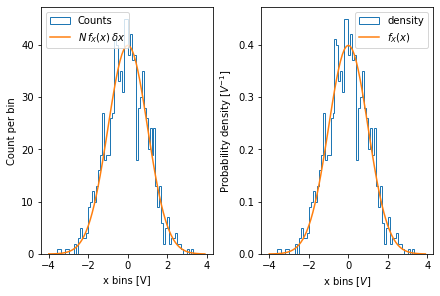

In [36]:
#plots as normal PDFs
rng = np.random.default_rng(19680801)

xdata = np.array([1.2, 2.3, 3.3, 3.1, 1.7, 3.4, 2.1, 1.25, 1.3])
xbins = np.array([1, 2, 3, 4])

# changing the style of the histogram bars just to make it
# very clear where the boundaries of the bins are:
style = {'facecolor': 'none', 'edgecolor': 'C0', 'linewidth': 3}


xdata = rng.normal(size=1000)
xpdf = np.arange(-4, 4, 0.1)
pdf = 1 / (np.sqrt(2 * np.pi)) * np.exp(-xpdf**2 / 2)
fig, ax = plt.subplot_mosaic([['False', 'True']], layout='constrained')
dx = 0.1
xbins = np.arange(-4, 4, dx)
ax['False'].hist(xdata, bins=xbins, density=False, histtype='step', label='Counts')

# scale and plot the expected pdf:
ax['False'].plot(xpdf, pdf * len(xdata) * dx, label=r'$N\,f_X(x)\,\delta x$')
ax['False'].set_ylabel('Count per bin')
ax['False'].set_xlabel('x bins [V]')
ax['False'].legend()

ax['True'].hist(xdata, bins=xbins, density=True, histtype='step', label='density')
ax['True'].plot(xpdf, pdf, label='$f_X(x)$')
ax['True'].set_ylabel('Probability density [$V^{-1}$]')
ax['True'].set_xlabel('x bins [$V$]')
ax['True'].legend()

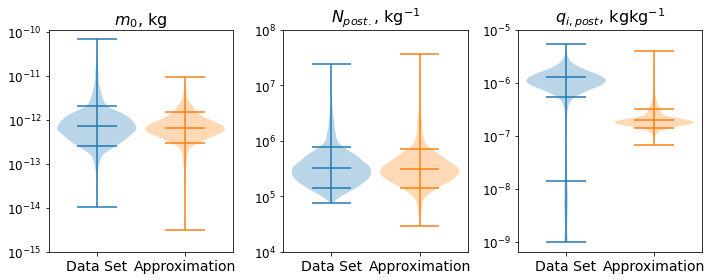

mean values of N : 463492.1539256837 474447.67210495635 
 diveation of the mean by : -2.3636901048877856


In [11]:
fig, axs = plt.subplots(ncols = 3, figsize=(10,4),tight_layout=True)
fs = 16
# plt.ylim(0,100)
axs[1].violinplot(np.log(Npost_joined_test), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[1].violinplot(np.log(n_post_test), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[0].violinplot(np.log(Mreal_joined_test), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[0].violinplot(np.log(simple_test), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
Qi0_fs_test = np.where(Qi0_fs_test[:]>1e-9,Qi0_fs_test[:],1e-9)
axs[2].violinplot(np.log(Qi0_fs_test), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[2].violinplot(np.log(simple_test*n_post_test), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
#axs.set_title('full system $N_{post.}$', fontsize=fs)
axs[1].set_title(r'$N_{post.}$, kg$^{-1}$',fontsize = fs)
axs[0].set_title(r'$m_0$, kg',fontsize = fs)
axs[2].set_title(r'$q_{i, post}$, kgkg$^{-1}$',fontsize = fs)

# plt.ylim(0,100)
# axs[0].set_yscale("log")
# axs[1].set_yscale("log")
ticksNpost = np.array([1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10])
ticksNs = (["$10^{-15}$", "$10^{-14}$", "$10^{-13}$", "$10^{-12}$", "$10^{-11}$","$10^{-10}$"])
axs[0].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e4, 1e5, 1e6, 1e7, 1e8])
ticksNs = (["$10^{4}$","$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$"])
axs[1].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e-9,1e-8, 1e-7, 1e-6, 1e-5])
ticksNs = (["$10^{-9}$","$10^{-8}$", "$10^{-7}$", "$10^{-6}$","$10^{-5}$"])
axs[2].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-2)
    ax.yaxis.set_tick_params(labelsize=fs-4)
    ax.set_xticks([0.5,1],['Data Set','Approximation'])
#axs.set_xticklabels(labels=[])
#axs[ 1].set_xlabel('density')
# axs.set_xlabel('probability',fontsize=fs)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('violin_plots_cos_woadv_filetered.png',dpi=300)
plt.savefig('output_draft_plots/PDF_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

print("mean values of N :", np.mean(Npost_joined_test), np.mean(n_post_test),"\n diveation of the mean by :", (np.mean(Npost_joined_test)-np.mean(n_post_test))/np.mean(Npost_joined_test)*100)


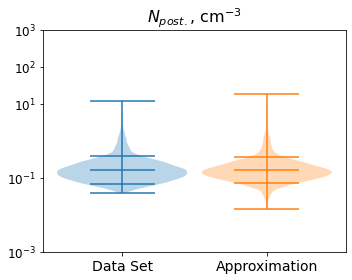

In [14]:
#plots for Ni in 1/cm3

rho_i = 920 #kg/m3 of ice
pho_dry_300_210 = 0.5 #kg/m3
scaled = 1e-6 # from 1/m3 to 1/cm3

fig, axs = plt.subplots( figsize=(5,4),tight_layout=True)
fs = 16
# plt.ylim(0,100)
axs.violinplot(np.log(Npost_joined_test*pho_dry_300_210*scaled), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.violinplot(np.log(n_post_test*pho_dry_300_210*scaled), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs.set_title(r'$N_{post.}$, cm$^{-3}$',fontsize = fs)


ticksNpost = np.array([1e-3, 1e-1, 1e1, 1e2, 1e3])
ticksNs = (["$10^{-3}$","$10^{-1}$", "$10^{1}$", "$10^{2}$", "$10^{3}$"])
axs.set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)


axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-4)
axs.set_ylim(np.log(1e-3), np.log(1e3))

axs.set_xticks([0.5,1],['Data Set','Approximation'])
#axs.set_xticklabels(labels=[])
#axs[ 1].set_xlabel('density')
# axs.set_xlabel('probability',fontsize=fs)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('violin_plots_cos_woadv_filetered.png',dpi=300)
#plt.savefig('output_draft_plots/PDF_independent_verific.png',bbox_inches='tight',dpi=300)
plt.show()

In [39]:
# check for advanced fit
def non_lin_nfm(x,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23):
    x1,x2,x3 = x
#     if (x1 <1e-5):
#         res = a1  + \
#     +a3*x2**(1/3)
#     else:
    
#     res =  (a1 + a2*x2**(1/4) ) + a5 *(x1) #+a3*x2**2/x1**2
#     res = a1  + a2* x2**(1/3) + a3 * np.log(x1) + a4 * x1**(1/3) + a5*x1*x2**2
#     res = a1  + a2* x2**(1/3)  + a4 * x1**(1/3) + a5*x1*x2**2
    #res = a1  + a2* x2**(1/3)+a7*x2   + a3 *x1**(1/3) #+ a5*x1*x2**2 +a6*x1**3
#     res = a1  + a2* x2**(1/3)+a7*x2   + a3 *x1**(1/3) + np.log(x1)*a2 *x2**(1/3)+a3*x1**(1/10)+a4 * x1**(1/3)
#     res = a1 * np.exp(-a2 * x2) +a4**(np.log(x1))+a5*np.log(x1)**2+a6#

#     x1 = np.log(x1)
    res = a1  + a2* x2**(1/3)   + a3 *x1**(1/3) + a4*x1*x2**(1/3) + \
    a5*x2+a6*x1**2 + a7*x2**2 + a8*x1*x2+a9*x2**3 + \
    +x3**(1/3)*a10+a11*np.log(x1) + a12*x2*x3 + a13*x3*np.log(x1) + a14*x2**(1/3)*np.log(x1)+a15*x3**(1/3)*np.log(x1)+\
    +a16*x1*x2*x3 + a17*x1*x2*x3**2
#     x3**(1/3)*np.log(x1)**3*a16 +a17*(a18*x2-x1*a19)**3 +a20 * np.exp(-a21 * x2)
#     res =a1*x1+ a2*x2+a3*x1**2 + a4*x2**2 + a5*x1*x2+a6*x1**3+a7*x2**3+\
#     +a8*x1**2*x2+a9*x1*x2**2+a10*x1**2*x2 +a11*x2**5+a12 + a13*x2*x1**4+a15+\
#     +x3**(1/3)*a20+x3**(1/3)*x1**3*a16 +a17*(a18*x2-x1*a19)**3 +a20 * np.exp(-a21 * x2)

#     res = a2*x2+a3*x1**2 + a4*x2**2 + a5*x1*x2+a7*x2**3+\
#     +a8*x1**2*x2+a9*x1*x2**2+a10*x1**2*x2 +a12 +a15+\
#     +x3**(1/3)*a20+x3**(1/3)*x1**3*a16 +a17*(a18*x2-x1*a19)**3 +a20 * np.exp(-a21 * x2)+a1*x3*x1+\
#     +a6*x3 + a11*x3**(1/3)+ a7*x2**(1/3)*x3*x1 #+ a22*x3*x2*np.exp(x1)+ a23*x3**x2
    return res


popt, pcov = curve_fit(non_lin_nfm, [(Ninit_joined),Ft0_joined,mstar_joined],np.log(Mreal_joined))
#popt, pcov = curve_fit(non_lin, [np.log(n_filtered),F_filtered,m0_filtered],np.log(mm_filtered))
print(*popt)
print('max error:',max(abs(Mreal_joined-np.exp(non_lin_nfm([(Ninit_joined),Ft0_joined,mstar_joined], *popt)))/Mreal_joined*100),
      'mean error',np.mean(abs(Mreal_joined-np.exp(non_lin_nfm([(Ninit_joined),Ft0_joined,mstar_joined], *popt)))/Mreal_joined*100))
# m0_nfm

-24.573542626960023 -127.8950501853877 0.10889033460513972 -0.0001532360067391786 9706.596031956842 7.853341744518011e-13 -4566267.070437579 0.006469862954809342 690028815.3722286 1960.8403283601272 -0.03191761218217018 1.0 362910136.73610234 -0.8892530522632157 96.45160589250274 2667777955.301054 1.0 1.0 1.0 1.0 1.0 1.0 1.0
max error: 30741.587777882585 mean error 23.3099295244809


In [76]:
# simple_test = new_simple_fit_13(Ninit_joined_test, Ft0_joined_test)
simple_test = np.exp(non_lin_nfm([Ninit_joined_test, Ft0_joined_test, mstar_joined_test], *popt))
n_post_test = N_post_check(Ninit_joined_test, Ft0_joined_test,simple_test)

deltaM = abs(simple_test-Mreal_joined_test)/Mreal_joined_test*100
deltaNpost = abs(n_post_test-Npost_joined_test)/Npost_joined_test*100

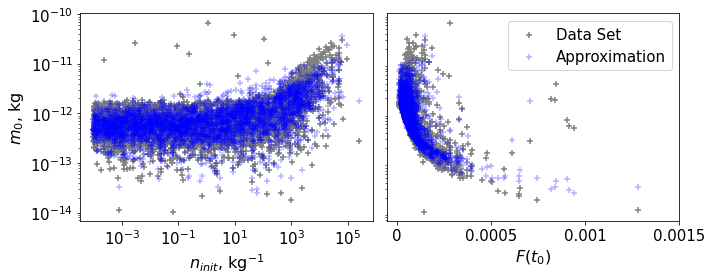

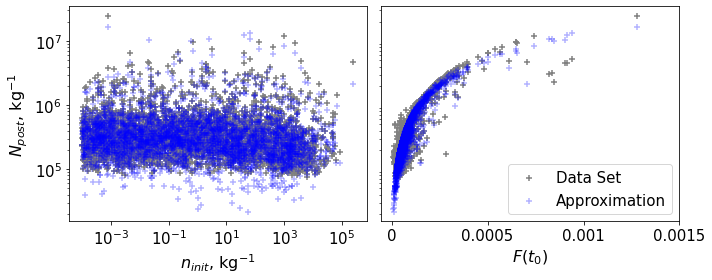

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),tight_layout=True)
ax[0].scatter(Ninit_joined_test,Mreal_joined_test,marker = '+',color = 'gray',label = 'Data Set')
ax[0].scatter(Ninit_joined_test,simple_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)
ax[0].set(yscale = 'log',xscale = 'log')
ax[1].scatter(Ft0_joined_test,Mreal_joined_test,marker = '+',color = 'gray',label = 'Data Set')
ax[1].scatter(Ft0_joined_test,simple_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)
ax[1].legend(loc = 'upper right',fontsize = 15)
ax[1].set(yscale = 'log')
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-1)
ax[0].set_xlabel(r'$n_{init}$, kg$^{-1}$',fontsize = fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize = fs)
ax[0].set_ylabel(r'$m_{0}$, kg',fontsize = fs)

ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015])
plt.savefig('output_draft_plots/m0_independent_verific_advanced.png',bbox_inches='tight',dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),tight_layout=True)
ax[0].scatter(Ninit_joined_test,Npost_joined_test,marker = '+',color = 'gray',label = 'Data Set')
ax[0].scatter(Ninit_joined_test,n_post_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)

ax[0].set(yscale = 'log',xscale = 'log')

# plt.show()
# fig, ax = plt.subplots(figsize=(7,5))
ax[1].scatter(Ft0_joined_test,Npost_joined_test,marker = '+',color = 'gray',label = 'Data Set')
# ax[1].scatter((Ft0_joined),(np.exp(non_lin_nfm([(Ninit_joined),Ft0_joined], *popt))),marker = '+',label = 'fit',color="red")

# ax[1].scatter(Ft0_joined[n_filter],Mreal_joined[n_filter],marker = '+',color = 'black',label = 'data')
# ax[1].scatter(Ft0_joined[F_filter],Mreal_joined[F_filter],marker = '+',color = 'blue',label = 'data')
# ax[0,1].scatter(ft_old,yy_nfm[1][:],marker = '+',color = 'gray',label = 'data')
# ax[1].set(ylim = (1e-15,1e-11))
ax[1].scatter(Ft0_joined_test,n_post_test,marker = '+',color = 'blue',label = 'Approximation',alpha = 0.3)
for axs in ax:
    axs.xaxis.set_tick_params(labelsize=fs-1)
    axs.yaxis.set_tick_params(labelsize=fs-1)
ax[1].legend(loc = 'lower right',fontsize = 15)
ax[1].set(yscale = 'log')
ax[0].set_xlabel(r'$n_{init}$, kg$^{-1}$',fontsize = fs)
ax[1].set_xlabel(r'$F(t_0)$',fontsize = fs)
ax[0].set_ylabel(r'$N_{post}$, kg$^{-1}$',fontsize = fs)
ax[1].set_yticklabels(labels=[])
ax[1].set_yticks([])
ax[1].set_xticks([0, 0.0005, 0.001, 0.0015])
ax[1].set_xticklabels([0, 0.0005, 0.001, 0.0015])
# plt.savefig('Npost_testDS.png',bbox_inches='tight',dpi=300)
plt.savefig('output_draft_plots/Npost_independent_verific_advanced.png',bbox_inches='tight',dpi=300)
plt.show()

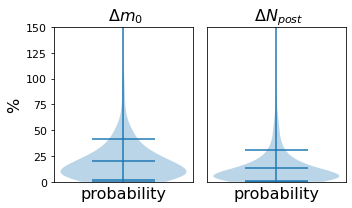

mean delta M and Npost: 19.980075898670833 13.754966812237566


In [78]:
fig, axs = plt.subplots(ncols = 2, figsize=(5, 3),tight_layout=True)
fs = 16
axs[0].set_ylim(0,150)
axs[1].set_ylim(0,150)
axs[0].violinplot(deltaM, [1], points=len(deltaM), widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
# axs[ 0].set_title('Produced $n$', fontsize=fs)
axs[1].violinplot(deltaNpost, [1], points=len(deltaM), widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
# axs[1].set_ylim(0,40)
#axs[ 1].violinplot(s_diff, [1], points=9918, widths=0.9,
                     #showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].set_title(' $\Delta m_{0}$', fontsize=fs)
axs[1].set_title(' $\Delta N_{post}$', fontsize=fs)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-5)
    ax.yaxis.set_tick_params(labelsize=fs-5)
    ax.set_xticks([])
    ax.set_xticklabels(labels=[])
    ax.set_xlabel('probability',fontsize=fs)
axs[0].set_ylabel('%',fontsize=fs)
axs[1].set_yticklabels(labels=[])
axs[1].set_yticks([])
# plt.savefig('m0_violine_Fn.png',dpi=300)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
plt.savefig('output_draft_plots/mN_violines_independent_verific_advanced.png',bbox_inches='tight',dpi=300)
plt.show()

print("mean delta M and Npost:", np.mean(deltaM), np.mean(deltaNpost))

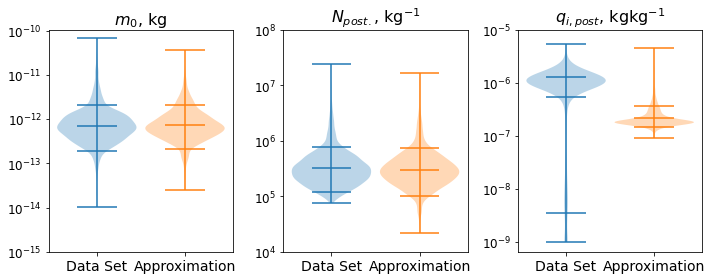

In [79]:
fig, axs = plt.subplots(ncols = 3, figsize=(10,4),tight_layout=True)
fs = 16
# plt.ylim(0,100)
axs[1].violinplot(np.log(Npost_joined_test), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[1].violinplot(np.log(n_post_test), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].violinplot(np.log(Mreal_joined_test), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[0].violinplot(np.log(simple_test), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
Qi0_fs_test = np.where(Qi0_fs_test[:]>1e-9,Qi0_fs_test[:],1e-9)
axs[2].violinplot(np.log(Qi0_fs_test), [0.5], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs[2].violinplot(np.log(simple_test*n_post_test), [1], points=len(n_post_test), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
#axs.set_title('full system $N_{post.}$', fontsize=fs)
axs[1].set_title(r'$N_{post.}$, kg$^{-1}$',fontsize = fs)
axs[0].set_title(r'$m_0$, kg',fontsize = fs)
axs[2].set_title(r'$q_{i, post}$, kgkg$^{-1}$',fontsize = fs)

# plt.ylim(0,100)
# axs[0].set_yscale("log")
# axs[1].set_yscale("log")
ticksNpost = np.array([1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10])
ticksNs = (["$10^{-15}$", "$10^{-14}$", "$10^{-13}$", "$10^{-12}$", "$10^{-11}$","$10^{-10}$"])
axs[0].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e4, 1e5, 1e6, 1e7, 1e8])
ticksNs = (["$10^{4}$","$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$"])
axs[1].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e-9,1e-8, 1e-7, 1e-6, 1e-5])
ticksNs = (["$10^{-9}$","$10^{-8}$", "$10^{-7}$", "$10^{-6}$","$10^{-5}$"])
axs[2].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-2)
    ax.yaxis.set_tick_params(labelsize=fs-4)
    ax.set_xticks([0.5,1],['Data Set','Approximation'])
#axs.set_xticklabels(labels=[])
#axs[ 1].set_xlabel('density')
# axs.set_xlabel('probability',fontsize=fs)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('violin_plots_cos_woadv_filetered.png',dpi=300)
plt.savefig('output_draft_plots/PDF_independent_verific_advanced.png',bbox_inches='tight',dpi=300)
plt.show()

In [185]:
# comparison of the approximation with usage of different dt 
d = [] 
# d = loadtxt("../partcel_mod_dat/VM_dataset_out_msgwambased_fs_nto1e2_1gw.dat",unpack = True)
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_6GWw00_fs.dat",unpack = True)
ngw =6
Mreal_fs = (d[3+3*ngw+4,:])
Ninit_fs = (d[0,:])
Npost_fs= (d[3+3*ngw+2,:])
Ft0_fs= (d[3+3*ngw+1,:])
Qi_post_fs =d[3+3*ngw+6,:]
N_case_fs  =d[3+3*ngw+7,:]
d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_6GWw00_par1.dat",unpack = True)
ngw =6
Mreal_param1 = (d[3+3*ngw+4,:])
Ninit_param1 = ( d[0,:])
Npost_param1= (d[3+3*ngw+2,:])
Ft0_param1= (d[3+3*ngw+1,:])
Qi_post_param1 =d[3+3*ngw+6,:]
N_case_param1 =d[3+3*ngw+7,:]
d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_6GWw00_par30.dat",unpack = True)
ngw =6
Mreal_param10 = (d[3+3*ngw+4,:])
Ninit_param10 = ( d[0,:])
Npost_param10= (d[3+3*ngw+2,:])
Ft0_param10= (d[3+3*ngw+1,:])
Qi_post_param10 =d[3+3*ngw+6,:]
N_case_param10 =d[3+3*ngw+7,:]
d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_6GWw00_par60.dat",unpack = True)
ngw =6
Mreal_param60 = (d[3+3*ngw+4,:])
Ninit_param60 = ( d[0,:])
Npost_param60= (d[3+3*ngw+2,:])
Ft0_param60= (d[3+3*ngw+1,:])
Qi_post_param60 =d[3+3*ngw+6,:]
N_case_param60 =d[3+3*ngw+7,:]

d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_6GWw00_par120.dat",unpack = True)
ngw =6
Mreal_param120 = (d[3+3*ngw+4,:])
Ninit_param120 = ( d[0,:])
Npost_param120= (d[3+3*ngw+2,:])
Ft0_param120= (d[3+3*ngw+1,:])
Qi_post_param120 =d[3+3*ngw+6,:]
N_case_param120 =d[3+3*ngw+7,:]
d = [] 
d = loadtxt("../partcel_mod_dat/VM_dataset_out_dataset_6GWw00_par240.dat",unpack = True)
ngw =6
Mreal_param240 = (d[3+3*ngw+4,:])
Ninit_param240 = ( d[0,:])
Npost_param240= (d[3+3*ngw+2,:])
Ft0_param240= (d[3+3*ngw+1,:])
Qi_post_param240 =d[3+3*ngw+6,:]
N_case_param240 =d[3+3*ngw+7,:]

simple_test = new_simple_fit_13(Ninit_fs, Ft0_fs)
n_post_test = N_post_check(Ninit_fs, Ft0_fs,simple_test)

In [31]:
(N_case_param1)

array([ 2250.,  2295.,  2492., ..., 19987., 19997., 19998.])

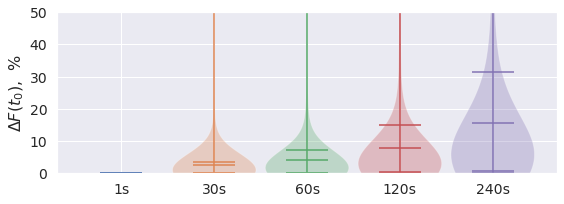

In [187]:
difFt01 = difference_in_2(Ft0_param1,Ft0_fs,N_case_param1, N_case_fs)
difFt010 = difference_in_2(Ft0_param10,Ft0_fs,N_case_param10, N_case_fs)
difFt060 = difference_in_2(Ft0_param60,Ft0_fs,N_case_param60, N_case_fs)
difFt0120 = difference_in_2(Ft0_param120,Ft0_fs,N_case_param120, N_case_fs)
difFt0240 = difference_in_2(Ft0_param240,Ft0_fs,N_case_param240, N_case_fs)
fig, axs = plt.subplots( figsize=(8,3),tight_layout=True)
fs = 16
axs.set_ylim(0,50)
axs.set_ylabel('$\Delta F(t_0)$,  %',fontsize=fs)
axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-2)
axs.violinplot(difFt01, [1], points=10000, widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs.violinplot(difFt010, [2], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs.violinplot(difFt060, [3], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.violinplot(difFt0120, [4], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.violinplot(difFt0240, [5], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs.set_xticks([1,2,3,4,5],["1s", "30s", "60s", "120s", "240s"])
# axs.set_title(r'deviation from the exact $F(t_0)$',fontsize=fs)

#plt.savefig('output_draft_plots/dt_Ft0_prediction.png',bbox_inches='tight',dpi=300)
plt.show()


/tmp/ipykernel_3957/1720822449.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  density = sum(norm(xi).pdf(x_d) for xi in x)


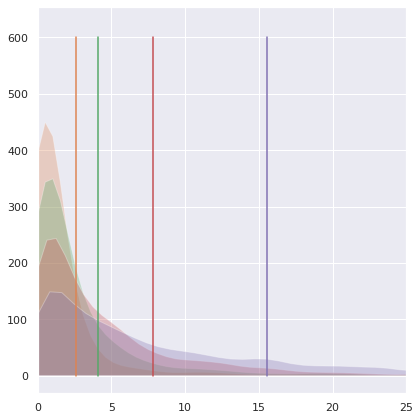

In [207]:
#plot as pdf-s with different colors 
def dens_k(dat):
    x = dat
    x_d = np.linspace(min(x),max(x), len(x))
    density = sum(norm(xi).pdf(x_d) for xi in x)
    axs.fill_between(x_d, density, alpha=0.3)
    axs.plot([np.mean(x),np.mean(x)],[0,600])


#hist = plt.hist(x, bins=300)



fig, axs = plt.subplots( figsize=(6,6),tight_layout=True)
#axs.fill_between(x_d, density, alpha=0.5)
dens_k(difFt01)
dens_k(difFt010)
dens_k(difFt060)
dens_k(difFt0120)
dens_k(difFt0240)
axs.set_xlim(0,25)

plt.show()

In [13]:
def print_stats(dat):
    print("max, mean and 90 percentiles for different time steps: ", max(dat), np.mean(dat), np.percentile(dat,90))

print_stats(difFt010)
print_stats(difFt060)
print_stats(difFt0120)
print_stats(difFt0240)

NameError: name 'difFt010' is not defined

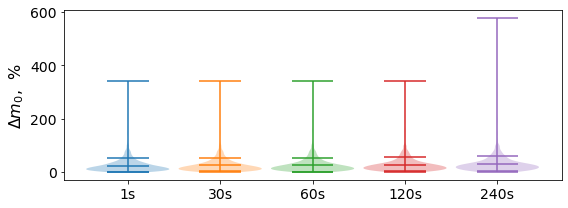

In [29]:
difmt01 = difference_in_2(Mreal_param1,Mreal_fs,N_case_param1, N_case_fs)
difmt010 = difference_in_2(Mreal_param10,Mreal_fs,N_case_param10, N_case_fs)
difmt060 = difference_in_2(Mreal_param60,Mreal_fs,N_case_param60, N_case_fs)
difmt0120 = difference_in_2(Mreal_param120,Mreal_fs,N_case_param120, N_case_fs)
difmt0240 = difference_in_2(Mreal_param240,Mreal_fs,N_case_param240, N_case_fs)

fig, axs = plt.subplots( figsize=(8,3),tight_layout=True)
fs = 16
axs.set_ylabel('$\Delta m_0$,  %',fontsize=fs)
axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-2)
# axs.set_ylim(0,200)

axs.violinplot(difmt01, [1], points=10000, widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difmt010, [2], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difmt060, [3], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difmt0120, [4], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difmt0240, [5], points = 10000,widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
# axs.set_title(r'deviation from the exact $m_0$',fontsize=fs)
axs.set_xticks([1,2,3,4,5],["1s", "30s", "60s", "120s", "240s"])
plt.savefig('output_draft_plots/dt_m0_prediction.png',bbox_inches='tight',dpi=300)
plt.show()

5098.023217876413


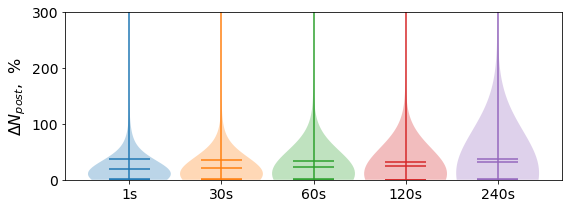

(array([ 292,  293,  321,  322,  323,  355,  426,  430,  445,  450,  465,
        468,  469,  470,  474,  517,  919, 1055, 1252, 1271, 1312, 1347,
       1401, 1402, 1407, 1464]),)
19.13995118211238 20.66673049373787 22.321830098270052 23.84326904414207 37.7271365582029


In [30]:
difnt01 = difference_in_2(Npost_param1,Npost_fs,N_case_param1, N_case_fs)
difnt010 = difference_in_2(Npost_param10,Npost_fs,N_case_param10, N_case_fs)
difnt060 = np.array(difference_in_2(Npost_param60,Npost_fs,N_case_param60, N_case_fs))
difnt0120 =np.array( difference_in_2(Npost_param120,Npost_fs,N_case_param120, N_case_fs))
difnt0240 = np.array(difference_in_2(Npost_param240,Npost_fs,N_case_param240, N_case_fs))
print(max(difnt0120))

#difnt060 = np.where(difnt060[:]<500,difnt060[:],500)
#difnt0120 = np.where(difnt0120[:]<500,difnt0120[:],500)
difnt0240 = np.where(difnt0240[:]<5000,difnt0240[:],5098)

fig, axs = plt.subplots( figsize=(8, 3),tight_layout=True)
fs = 16
axs.set_ylim(0,300)
axs.set_ylabel('$\Delta N_{post}$,  %',fontsize=fs)
axs.xaxis.set_tick_params(labelsize=fs-2)
axs.yaxis.set_tick_params(labelsize=fs-2)
axs.violinplot(difnt01, [1], points=len(difnt01), widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difnt010, [2], points = len(difnt010),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])

axs.violinplot(difnt060, [3], points = len(difnt060),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difnt0120, [4], points = len(difnt0120),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
axs.violinplot(difnt0240, [5], points = len(difnt0240),widths=0.9,
                     showmeans=True, showextrema=True,quantiles=[0.05, 0.9])
# axs.plot([0,6],[19.14,19.14])
# axs.set_title(r'deviation from the exact $N_{post}$',fontsize=fs)
axs.set_xticks([1,2,3,4,5],["1s", "30s", "60s", "120s", "240s"])
plt.savefig('output_draft_plots/dt_Npost_prediction.png',bbox_inches='tight',dpi=300)
plt.show()

print(np.where(difnt0240>100))
print(np.mean(difnt01), np.mean(difnt010),np.mean(difnt060),np.mean(difnt0120),np.mean(difnt0240))

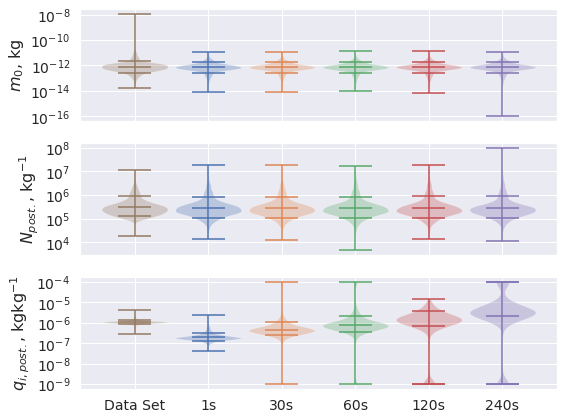

max, mean and 90 percentiles for different time steps:  11986163.373655416 464877.29179788154 911427.2397785786
difference of the max, mean, min from the reference: 0.0
max, mean and 90 percentiles for different time steps:  18382275.138294853 456736.50018390734 829617.3072282495
difference of the max, mean, min from the reference: -1.7823825358157863
max, mean and 90 percentiles for different time steps:  17950676.556969874 464299.36520207033 837161.9080693176
difference of the max, mean, min from the reference: -0.12447283781223469
max, mean and 90 percentiles for different time steps:  16486617.061383575 472652.31483422295 850546.3201197516
difference of the max, mean, min from the reference: 1.6449772469787671
max, mean and 90 percentiles for different time steps:  19405752.324866604 474649.4736178775 891780.5730928183
difference of the max, mean, min from the reference: 2.0588207431286856
max, mean and 90 percentiles for different time steps:  100000000.0 815835.8468817413 927026.

In [208]:
fig, axs = plt.subplots(nrows = 3, figsize=(8,6),tight_layout=True)
fs = 16
# plt.ylim(0,100)
ticksNpost = np.array([1e-16, 1e-14, 1e-12, 1e-10, 1e-8])
ticksNs = (["$10^{-16}$", "$10^{-14}$", "$10^{-12}$", "$10^{-10}$", "$10^{-8}$"])
axs[0].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e4, 1e5, 1e6, 1e7, 1e8])
ticksNs = (["$10^{4}$","$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$"])
axs[1].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e-9,1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
ticksNs = (["$10^{-9}$","$10^{-8}$", "$10^{-7}$", "$10^{-6}$","$10^{-5}$","$10^{-4}$"])
axs[2].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)
axs[0].set_ylabel(r'$m_{0}$, kg',fontsize = fs)


axs[1].violinplot(np.log(Npost_param1), [1.5], points=len(Npost_param1), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[1].violinplot(np.log(Npost_param10), [2], points=len(Npost_param10), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[1].violinplot(np.log(Npost_param60), [2.5], points=len(Npost_param60), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[1].violinplot(np.log(Npost_param120), [3], points=len(Npost_param120), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[1].violinplot(np.log( np.where(Npost_param240[:]<1e8,Npost_param240[:],1e8)), [3.5], points=len(Npost_param240), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[1].set_ylabel(r'$N_{post.}$, kg$^{-1}$',fontsize = fs)
parts=axs[1].violinplot(np.log(Npost_fs), [1], points=len(Npost_fs), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# plt.ylim(0,100)
#axs[0].set_yscale("log")
# axs[1].set_yscale("log")
axs[2].set_ylabel(r'$q_{i, post.}$, kgkg$^{-1}$',fontsize = fs)


axs[0].violinplot(np.log(Mreal_param1), [1.5], points=len(Npost_param1), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[0].violinplot(np.log(Mreal_param10), [2], points=len(Npost_param10), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[0].violinplot(np.log(Mreal_param60), [2.5], points=len(Npost_param60), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[0].violinplot(np.log(Mreal_param120), [3], points=len(Npost_param120), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[0].violinplot(np.log(np.where(Mreal_param240[:]>1e-16,Mreal_param240[:],1e-16)), [3.5], points=len(Npost_param240), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[0].violinplot(np.log(Mreal_fs), [1], points=len(Mreal_fs), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# axs[1].set_yscale('log')


axs[2].violinplot(np.log(Qi_post_param1), [1.5], points=len(Npost_param1), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
q10 = np.where(Qi_post_param10[:]<1e-4,Qi_post_param10[:],1e-4)
q10 = np.where(q10[:]>1e-9,q10[:],1e-9)

q60 = np.where(Qi_post_param60[:]<1e-4,Qi_post_param60[:],1e-4)
q60 = np.where(q60[:]>1e-9,q60[:],1e-9)
axs[2].violinplot(np.log(q10), [2], points=len(Qi_post_param10), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[2].violinplot(np.log(q60), [2.5], points=len(Npost_param60), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

q120 = np.where(Qi_post_param120[:]<1e-4,Qi_post_param120[:],1e-4)
q120 = np.where(q120[:]>1e-9,q120[:],1e-9)
axs[2].violinplot(np.log(q120), [3], points=len(Npost_param120), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

q240 = np.where(Qi_post_param240[:]<1e-4,Qi_post_param240[:],1e-4)
q240 = np.where(q240[:]>1e-9,q240[:],1e-9)
axs[2].violinplot(np.log(q240), [3.5], points=len(Npost_param240), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[2].violinplot(np.log(Qi_post_fs), [1], points=len(Npost_fs), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# axs[2].set_yscale('log')
# axs[2].set_ylim(1e-19,1e-3)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-2)
    ax.yaxis.set_tick_params(labelsize=fs-2)
    ax.set_xticks([1,1.5,2,2.5,3,3.5],["Data Set","1s", "30s", "60s", "120s", "240s"])
    ax.label_outer()
    
# for pc in parts['bodies']:
#     pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
#     pc.set_alpha(1)

#axs.set_xticklabels(labels=[])
#axs[ 1].set_xlabel('density')
# axs.set_xlabel('probability',fontsize=fs)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('violin_plots_cos_woadv_filetered.png',dpi=300)
# plt.savefig('PDF_mnq_presentation.png',bbox_inches='tight',dpi=300)
plt.savefig('output_draft_plots/PDF_different_dt.png',bbox_inches='tight',dpi=300)
plt.show()

def print_stats(dat,datref):
    print("max, mean and 90 percentiles for different time steps: ", max(dat), np.mean(dat), np.percentile(dat,90))
    print("difference of the max, mean, min from the reference:", (np.mean(dat)-np.mean(datref))/np.mean(dat)*100)

print_stats(Npost_fs,Npost_fs)
print_stats(Npost_param1,Npost_fs)
print_stats(Npost_param10,Npost_fs)
print_stats(Npost_param60,Npost_fs)
print_stats(Npost_param120,Npost_fs)
print_stats(np.where(Npost_param240[:]<1e8,Npost_param240[:],1e8),Npost_fs)



NameError: name 'rad_fromMMreal_param120' is not defined

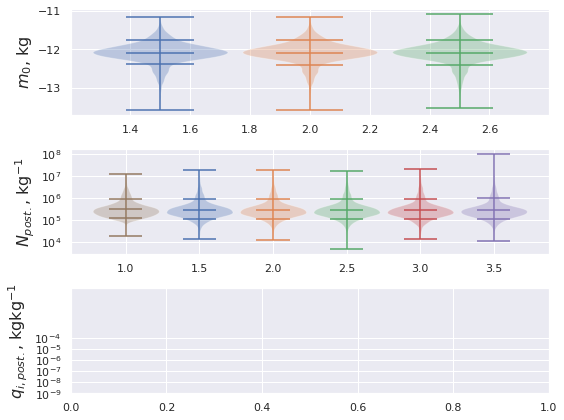

In [218]:
fig, axs = plt.subplots(nrows = 3, figsize=(8,6),tight_layout=True)
fs = 16
# plt.ylim(0,100)


ticksNpost = np.array([1e4, 1e5, 1e6, 1e7, 1e8])
ticksNs = (["$10^{4}$","$10^{5}$", "$10^{6}$", "$10^{7}$", "$10^{8}$"])
axs[1].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)

ticksNpost = np.array([1e-9,1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
ticksNs = (["$10^{-9}$","$10^{-8}$", "$10^{-7}$", "$10^{-6}$","$10^{-5}$","$10^{-4}$"])
axs[2].set_yticks(np.log(ticksNpost), ticksNs,
       rotation=0)
axs[0].set_ylabel(r'$m_{0}$, kg',fontsize = fs)


axs[1].violinplot(np.log(Npost_param1), [1.5], points=len(Npost_param1), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[1].violinplot(np.log(Npost_param10), [2], points=len(Npost_param10), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[1].violinplot(np.log(Npost_param60), [2.5], points=len(Npost_param60), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[1].violinplot(np.log(Npost_param120), [3], points=len(Npost_param120), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[1].violinplot(np.log( np.where(Npost_param240[:]<1e8,Npost_param240[:],1e8)), [3.5], points=len(Npost_param240), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[1].set_ylabel(r'$N_{post.}$, kg$^{-1}$',fontsize = fs)
parts=axs[1].violinplot(np.log(Npost_fs), [1], points=len(Npost_fs), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# plt.ylim(0,100)
#axs[0].set_yscale("log")
# axs[1].set_yscale("log")
axs[2].set_ylabel(r'$q_{i, post.}$, kgkg$^{-1}$',fontsize = fs)


axs[0].violinplot(np.log(rad_fromM(Mreal_param1)), [1.5], points=len(Npost_param1), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

axs[0].violinplot(np.log(rad_fromM(Mreal_param10)), [2], points=len(Npost_param10), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[0].violinplot(np.log(rad_fromM(Mreal_param60)), [2.5], points=len(Npost_param60), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[0].violinplot(np.log(rad_fromMMreal_param120), [3], points=len(Npost_param120), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

# axs[1].set_yscale('log')


axs[2].violinplot(np.log(Qi_post_param1), [1.5], points=len(Npost_param1), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
q10 = np.where(Qi_post_param10[:]<1e-4,Qi_post_param10[:],1e-4)
q10 = np.where(q10[:]>1e-9,q10[:],1e-9)

q60 = np.where(Qi_post_param60[:]<1e-4,Qi_post_param60[:],1e-4)
q60 = np.where(q60[:]>1e-9,q60[:],1e-9)
axs[2].violinplot(np.log(q10), [2], points=len(Qi_post_param10), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])


axs[2].violinplot(np.log(q60), [2.5], points=len(Npost_param60), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

q120 = np.where(Qi_post_param120[:]<1e-4,Qi_post_param120[:],1e-4)
q120 = np.where(q120[:]>1e-9,q120[:],1e-9)
axs[2].violinplot(np.log(q120), [3], points=len(Npost_param120), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])

q240 = np.where(Qi_post_param240[:]<1e-4,Qi_post_param240[:],1e-4)
q240 = np.where(q240[:]>1e-9,q240[:],1e-9)
axs[2].violinplot(np.log(q240), [3.5], points=len(Npost_param240), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
axs[2].violinplot(np.log(Qi_post_fs), [1], points=len(Npost_fs), widths=0.45,
                     showmeans=True, showextrema=True,quantiles=[0.1, 0.9])
# axs[2].set_yscale('log')
# axs[2].set_ylim(1e-19,1e-3)
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=fs-2)
    ax.yaxis.set_tick_params(labelsize=fs-2)
    ax.set_xticks([1,1.5,2,2.5,3,3.5],["Data Set","1s", "30s", "60s", "120s", "240s"])
    ax.label_outer()
    
# for pc in parts['bodies']:
#     pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
#     pc.set_alpha(1)

#axs.set_xticklabels(labels=[])
#axs[ 1].set_xlabel('density')
# axs.set_xlabel('probability',fontsize=fs)
# plt.savefig('output_poster/violin_cos_adv_filetered_3h_cut_new_Tdep.png',dpi=300)
#plt.savefig('violin_plots_cos_woadv_filetered.png',dpi=300)
# plt.savefig('PDF_mnq_presentation.png',bbox_inches='tight',dpi=300)
plt.savefig('output_draft_plots/PDF_different_dt.png',bbox_inches='tight',dpi=300)
plt.show()


In [215]:
rad_fromM(Mreal_param1)

array([6.33628564e-06, 4.98245142e-06, 5.75068109e-06, ...,
       3.26463766e-06, 3.28289446e-06, 4.91444710e-06])

/tmp/ipykernel_3957/1720822449.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  density = sum(norm(xi).pdf(x_d) for xi in x)


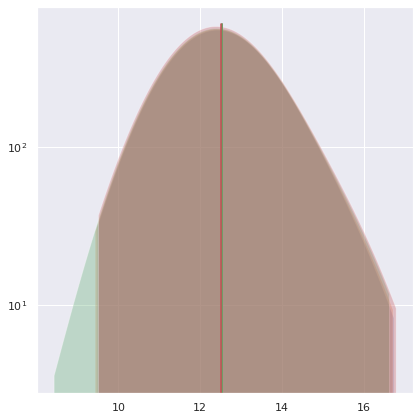

In [213]:
fig, axs = plt.subplots( figsize=(6,6),tight_layout=True)
#axs.fill_between(x_d, density, alpha=0.5)
dens_k(np.log(Npost_param1))
dens_k(np.log(Npost_param10))
dens_k(np.log(Npost_param60))
dens_k(np.log(Npost_param120))
dens_k(np.log(Npost_param240))
#axs.set_xlim(0,25)
axs.set_yscale('log')
plt.show()

/tmp/ipykernel_3957/1720822449.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  density = sum(norm(xi).pdf(x_d) for xi in x)
/tmp/ipykernel_3957/3344067870.py:7: RuntimeWarning: divide by zero encountered in log
  dens_k(np.log(Mreal_param240))
/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/administrator/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


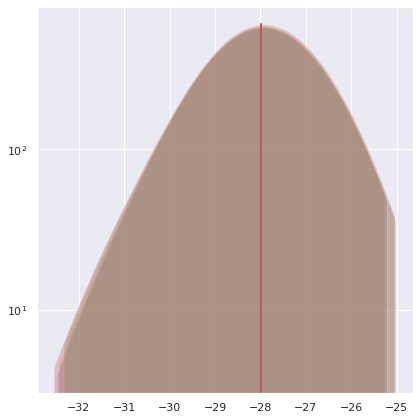

In [214]:
fig, axs = plt.subplots( figsize=(6,6),tight_layout=True)
#axs.fill_between(x_d, density, alpha=0.5)
dens_k(np.log(Mreal_param1))
dens_k(np.log(Mreal_param10))
dens_k(np.log(Mreal_param60))
dens_k(np.log(Mreal_param120))
dens_k(np.log(Mreal_param240))
#axs.set_xlim(0,25)
axs.set_yscale('log')
plt.show()

In [50]:
# recalculate radius assumin spherical particles
def rad_fromM(m):
    rho_i = 920 # kg m-3
    return (3/4*m/(pi*rho_i))**(1/3)


In [24]:
print_stats(Qi_post_fs,Qi_post_fs)
print_stats(Qi_post_param1,Qi_post_fs)
print_stats(q10,Qi_post_fs)
print_stats(q60,Qi_post_fs)
print_stats(q120,Qi_post_fs)
print_stats(Npost_param120,Qi_post_fs)
print_stats(q240,Qi_post_fs)

max, mean and 90 percentiles for different time steps:  3.959918046232004e-06 1.1000074232481662e-06 1.3341015747609884e-06
difference of the max, mean, min from the reference: 0.0
max, mean and 90 percentiles for different time steps:  2.341341400495631e-06 2.2272321410732872e-07 3.21335879517276e-07
difference of the max, mean, min from the reference: -393.8898837541382
max, mean and 90 percentiles for different time steps:  0.0001 2.2292929712193608e-06 1.0621573759809694e-06
difference of the max, mean, min from the reference: 50.656668394441986
max, mean and 90 percentiles for different time steps:  0.0001 4.2145261769769595e-06 2.2241742094714405e-06
difference of the max, mean, min from the reference: 73.89961820008931
max, mean and 90 percentiles for different time steps:  1.483924377293662e-05 1.7084027527656272e-06 3.5542946820099065e-06
difference of the max, mean, min from the reference: 35.611938024132044
max, mean and 90 percentiles for different time steps:  19405752.324

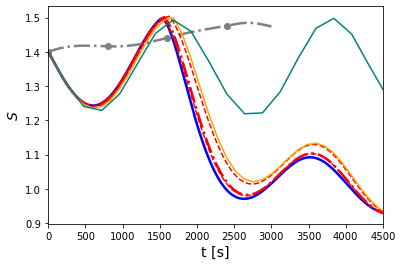

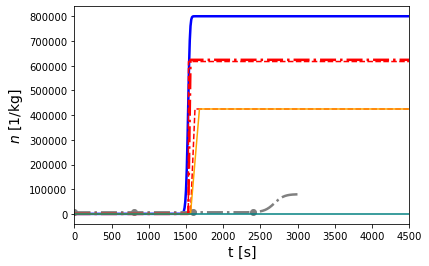

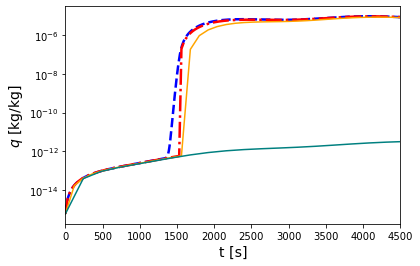

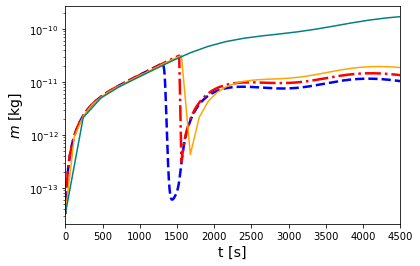

In [4]:
# single case evolution of the parameters comparison 


# test_ft_1gw_new = read_data_dat('../partcel_mod_dat/VM_specific_out_parameterisation.dat')
test_rs=read_data_dat('../partcel_mod_dat/VM_specific_out_red_verif3.dat')
test_ft_1gw_new=read_data_dat('../partcel_mod_dat/VM_specific_out_fs_verif3.dat')
# test_ft_1gw_param = read_data_dat('../partcel_mod_dat/VM_specific_out_parameterisation.dat')
# test_ft_1gw = read_data_dat('../partcel_mod_dat/VM_specific_out_fullsyst_10gw.dat')
# test_shifted = read_data_dat('../partcel_mod_dat/VM_specific_out_fullsyst_test11.dat')
#test_ft_cor = read_data_dat('data_test_forcing_2vars_corrected.dat')

test_param_1 = read_data_dat('../partcel_mod_dat/VM_specific_out_par1_verif3.dat')
# test_param_10 = read_data_dat('../partcel_mod_dat/VM_specific_out_par240_verif.dat')
test_param_30 = read_data_dat('../partcel_mod_dat/VM_specific_out_par30_verif3.dat')
test_param_60 = read_data_dat('../partcel_mod_dat/VM_specific_out_par60_verif3.dat')
test_param_120 = read_data_dat('../partcel_mod_dat/VM_specific_out_par120_verif3.dat')
test_param_240 = read_data_dat('../partcel_mod_dat/VM_specific_out_red240_verif3.dat')
xmax = 4500


fig, ax = plt.subplots()
ax.set_xlim(0,xmax)
ax.plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[2][:]), color='blue',linestyle ='-', linewidth=2.5, label='full system')
ax.plot(np.array(test_rs[0][:]), np.array(test_rs[2][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 80,label='reduced system')
# ax.plot(np.array(test_ft_1gw_param[0][:]), np.array(test_ft_1gw_param[2][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation')
ax.plot(np.array(test_param_1[0][:]), np.array(test_param_1[2][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 1s$')
# ax.plot(np.array(test_param_10[0][:]), np.array(test_param_10[2][:]), color='teal',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 10s$')
ax.plot(np.array(test_param_30[0][:]), np.array(test_param_30[2][:]), color='red',linestyle ='-.', linewidth=2.5, label='parameterisation, $dt = 30s$')
ax.plot(np.array(test_param_60[0][:]), np.array(test_param_60[2][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 60s$')
ax.plot(np.array(test_param_120[0][:]), np.array(test_param_120[2][:]), color='orange',linestyle ='-', linewidth=1.5, label='parameterisation, $dt = 120s$')
ax.plot(np.array(test_param_240[0][:]), np.array(test_param_240[2][:]), color='teal',linestyle ='-', linewidth=1.5, label='parameterisation, $dt = 240s$')
# ax.set_ylim(1.4,1.55)
plt.xlabel('t [s]',fontsize = 14)
plt.ylabel('$S$',fontsize = 14)
#plt.title('S(0) = 1.4, n(0) = 2* 10$^5$ [1/kg]',fontsize=14)

#ax.set(xlim = (0,30),ylim=(1.4,1.55))
#plt.savefig('S1.4_phi3pi10.png')
plt.savefig('output/S_singleNucl.png',bbox_inches='tight',dpi=300)
plt.show()
fig, ax = plt.subplots()
ax.set_xlim(0,xmax)
ax.plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[1][:]), color='blue',linestyle ='-', linewidth=2.5, label='full system')
ax.plot(np.array(test_rs[0][:]), np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 80,label='reduced system')
# ax.plot(np.array(test_ft_1gw_param[0][:]), np.array(test_ft_1gw_param[1][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation')
ax.plot(np.array(test_param_1[0][:]), np.array(test_param_1[1][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 1s$')
# ax.plot(np.array(test_param_10[0][:]), np.array(test_param_10[1][:]), color='teal',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 10s$')
ax.plot(np.array(test_param_30[0][:]), np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax.plot(np.array(test_param_60[0][:]), np.array(test_param_60[1][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 60s$')
ax.plot(np.array(test_param_120[0][:]), np.array(test_param_120[1][:]), color='orange',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax.plot(np.array(test_param_240[0][:]), np.array(test_param_240[1][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')
# ax.set_yscale("log")

plt.xlabel('t [s]',fontsize = 14)
plt.ylabel('$n$ [1/kg]',fontsize = 14)
# ax.plot([tt0,tt0],[0,2.5e6])
# ax.legend(loc='lower right', fontsize=15)
# plt.savefig('output/n_singleNucl.png',bbox_inches='tight',dpi=300)

plt.show()

fig, ax = plt.subplots()
ax.set_xlim(0,xmax)
#ax.plot(test_ft[0][:], np.zeros((len(test_ft[0][:])))+3.2, color='blue',linestyle ='-', linewidth=1.5, label='A')
#ax.plot(np.array(test_ft_vm_old[3][:]), np.array(test_ft_vm_old[0][:]), color='black',linestyle ='--', linewidth=1.5, label='2 vars sys VM')
ax.plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:]), color='blue',linestyle ='--', linewidth=2.5, label='reduced system')
# ax.plot(np.array(test_rs[0][:]), np.array(test_rs[3][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 80,label='reduced system')
# ax.plot(np.array(test_ft_1gw_param[0][:]), np.array(test_ft_1gw_param[3][:]), color='red',linestyle ='--', linewidth=1.5, label='reduced system')
# ax.plot(np.array(test_param_1[0][:]), np.array(test_param_1[3][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 1s$')
# ax.plot(np.array(test_param_10[0][:]), np.array(test_param_10[3][:]), color='teal',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 10s$')
ax.plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
# ax.plot(np.array(test_param_60[0][:]), np.array(test_param_60[3][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 60s$')
ax.plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:]), color='orange',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax.plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')

plt.xlabel('t [s]',fontsize = 14)
ax.set_yscale("log")


plt.ylabel('$q$ [kg/kg]',fontsize = 14)
# plt.title('S(0) = 1.4, n(0) = 2* 10$^5$ [1/kg]',fontsize=14)

#ax.legend(loc='upper right', fontsize=15)
# plt.savefig('output/q_singleNucl.png',bbox_inches='tight',dpi=300)

plt.show()

fig, ax = plt.subplots()
ax.set_xlim(0,xmax)
#ax.plot(test_ft[0][:], np.zeros((len(test_ft[0][:])))+3.2, color='blue',linestyle ='-', linewidth=1.5, label='A')
#ax.plot(np.array(test_ft_vm_old[3][:]), np.array(test_ft_vm_old[0][:]), color='black',linestyle ='--', linewidth=1.5, label='2 vars sys VM')
ax.plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:])/ np.array(test_ft_1gw_new[1][:]), color='blue',linestyle ='--', linewidth=2.5, label='full system solution')
# ax.plot(np.array(test_rs[0][:]), np.array(test_rs[3][:])/np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 80,label='reduced system')
# ax.plot(np.array(test_ft_1gw_param[0][:]), np.array(test_ft_1gw_param[3][:])/ np.array(test_ft_1gw_param[1][:]), color='red',linestyle ='--', linewidth=1.5, label='full system solution')
ax.plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:])/np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
# ax.plot(np.array(test_param_60[0][:]), np.array(test_param_60[3][:]), color='red',linestyle ='--', linewidth=1.5, label='parameterisation, $dt = 60s$')
ax.plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:])/np.array(test_param_120[1][:]), color='orange',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax.plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:])/np.array(test_param_240[1][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')
plt.xlabel('t [s]',fontsize = 14)
# ax.plot([0,300],[mm,mm], color = "red")
# ax.plot([tt0,tt0],[0,1e-12])
ax.set_yscale("log")
plt.ylabel('$m$ [kg]',fontsize = 14)
# plt.title('S(0) = 1.4, n(0) = 2* 10$^5$ [1/kg]',fontsize=14)

#ax.legend(loc='upper right', fontsize=15)
# plt.savefig('output/m_singleNucl.png',bbox_inches='tight',dpi=300)
plt.show()

In [101]:
test_rs=read_data_dat('../partcel_mod_dat/VM_specific_out_red_verif2.dat')
test_ft_1gw_new=read_data_dat('../partcel_mod_dat/VM_specific_out_fs_verif2.dat')

test_param_30 = read_data_dat('../partcel_mod_dat/VM_specific_out_par30_verif2.dat')
test_param_60 = read_data_dat('../partcel_mod_dat/VM_specific_out_par60_verif2.dat')
test_param_120 = read_data_dat('../partcel_mod_dat/VM_specific_out_par120_verif2.dat')
test_param_240 = read_data_dat('../partcel_mod_dat/VM_specific_out_par240_verif2.dat')
xmax = 4500

In [103]:
test_rs=read_data_dat('../partcel_mod_dat/VM_specific_out_red_verif.dat')
test_ft_1gw_new=read_data_dat('../partcel_mod_dat/VM_specific_out_fs_verif.dat')

test_param_30 = read_data_dat('../partcel_mod_dat/VM_specific_out_par30_verif.dat')
test_param_60 = read_data_dat('../partcel_mod_dat/VM_specific_out_par60_verif.dat')
test_param_120 = read_data_dat('../partcel_mod_dat/VM_specific_out_par120_verif.dat')
test_param_240 = read_data_dat('../partcel_mod_dat/VM_specific_out_par240_verif.dat')
xmax = 4500

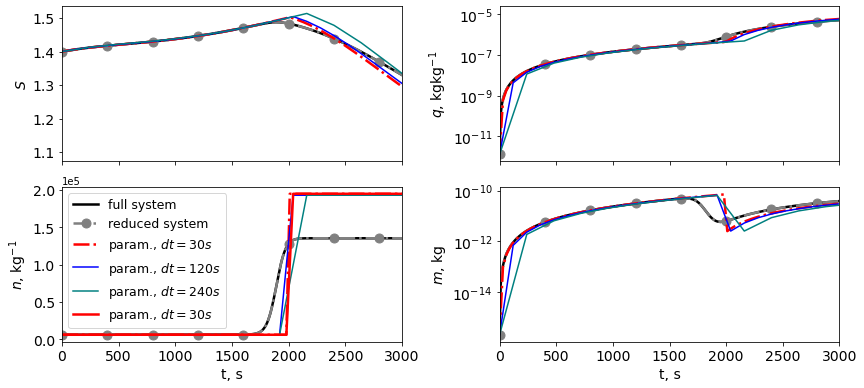

In [104]:
# merged plot for S, n, qi, m
# comparison of the full system with parameterisation
xmax = 3000
xmin = 0
fig, ax = plt.subplots(ncols = 2,nrows = 2,figsize=(12, 5.5),tight_layout=True)
for axs in ax.flat:
    axs.set_xlim(xmin,xmax)
    
    axs.xaxis.set_tick_params(labelsize=fs-2)
    axs.yaxis.set_tick_params(labelsize=fs-2)
#     axs.label_outer()
ax[1,0].set_xlabel('t, s',fontsize = 14)
ax[1,1].set_xlabel('t, s',fontsize = 14)
# ticksNpost = np.array([0,2e5,4e5, 6e5, 8e5])
# ticksNs = (["0$","$10^{5}$", "$10^{6}$"])
# ax[0,1].set_yticks((ticksNpost), ticksNs,
#        rotation=0)
ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,2))
# ax[0,1].ticklabel_format(style='sci', axis='x', scilimits=(0,2))
ax[0,0].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[2][:]), color='black',linestyle ='-', linewidth=2.5, label='full system')
ax[0,0].plot(np.array(test_rs[0][:]), np.array(test_rs[2][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
# ax[0,0].plot(np.array(test_param_1[0][:]), np.array(test_param_1[2][:]), color='red',linestyle ='--', linewidth=2.5, label='parameterisation, $dt = 1s$')
ax[0,0].plot(np.array(test_param_30[0][:]), np.array(test_param_30[2][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,0].plot(np.array(test_param_120[0][:]), np.array(test_param_120[2][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[0,0].plot(np.array(test_param_240[0][:]), np.array(test_param_240[2][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')
ax[0,0].set_ylabel('$S$',fontsize = 14)


ax[1,0].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[1][:]), color='black',linestyle ='-', linewidth=2.5, label='full system')
ax[1,0].plot(np.array(test_rs[0][:]), np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
# ax[1,0].plot(np.array(test_param_1[0][:]), np.array(test_param_1[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 1s$')
ax[1,0].plot(np.array(test_param_30[0][:]), np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,0].plot(np.array(test_param_120[0][:]), np.array(test_param_120[1][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[1,0].plot(np.array(test_param_240[0][:]), np.array(test_param_240[1][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')
ax[1,0].set_ylabel('$n$, kg$^{-1}$',fontsize = 14)
ax[1,0].plot(np.array(test_param_60[0][:]), np.array(test_param_60[1][:]), color='red',linestyle ='-', linewidth=2.5, label='param., $dt = 30s$')

ax[0,1].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:]), color='black',linestyle ='-', linewidth=2.5, label='reduced system')
ax[0,1].plot(np.array(test_rs[0][:]), np.array(test_rs[3][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
# ax[0,1].plot(np.array(test_ft_1gw_param[0][:]), np.array(test_ft_1gw_param[3][:]), color='red',linestyle ='--', linewidth=1.5, label='reduced system')
# ax[0,1].plot(np.array(test_param_1[0][:]), np.array(test_param_1[3][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,1].plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[0,1].plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[0,1].plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')
ax[0,1].set_yscale("log")


ax[0,1].set_ylabel('$q$, kgkg$^{-1}$',fontsize = 14)


ax[1,1].plot(np.array(test_ft_1gw_new[0][:]), np.array(test_ft_1gw_new[3][:])/ np.array(test_ft_1gw_new[1][:]), color='black',linestyle ='-', linewidth=2.5, label='full system solution')
ax[1,1].plot(np.array(test_rs[0][:]), np.array(test_rs[3][:])/np.array(test_rs[1][:]), color='gray',linestyle ='-.', linewidth=2.5, marker = "o",markevery = 40,markersize = 9,label='reduced system')
# ax[1,1].plot(np.array(test_param_1[0][:]), np.array(test_param_1[3][:])/np.array(test_param_1[1][:]), color="red",linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,1].plot(np.array(test_param_30[0][:]), np.array(test_param_30[3][:])/np.array(test_param_30[1][:]), color='red',linestyle ='-.', linewidth=2.5, label='param., $dt = 30s$')
ax[1,1].plot(np.array(test_param_120[0][:]), np.array(test_param_120[3][:])/np.array(test_param_120[1][:]), color='blue',linestyle ='-', linewidth=1.5, label='param., $dt = 120s$')
ax[1,1].plot(np.array(test_param_240[0][:]), np.array(test_param_240[3][:])/np.array(test_param_240[1][:]), color='teal',linestyle ='-', linewidth=1.5, label='param., $dt = 240s$')

ax[1,1].set_yscale("log")
ax[1,1].set_ylabel('$m$, kg',fontsize = 14)

ax[0,0].set_xticklabels(labels=[])
# ax[0,0].set_xticks([])
ax[0,1].set_xticklabels(labels=[])
# ax[0,1].set_xticks([])
ax[1,0].legend(loc='upper left', fontsize=fs-3.5)
# ax[1,0].legend(loc='lower right', fontsize=fs-3.5)

# plt.savefig('output_draft_plots/Single_nucl_var2.png',bbox_inches='tight',dpi=300)
# plt.savefig('output_draft_plots/Single_nucl_var1.png',bbox_inches='tight',dpi=300)
plt.show()

In [43]:
npost_full = max(np.array(test_ft_1gw_new[1][:]))
npost_30 = max(test_param_30[1][:])
npost_120 = max(test_param_120[1][:])
npost_60 = max(test_param_60[1][:])
print((npost_30-npost_full)/npost_full*100)
print((npost_60-npost_full)/npost_full*100)
print((npost_120-npost_full)/npost_full*100)

-22.040532312520543
-46.917239502532574
-46.917239502532574
